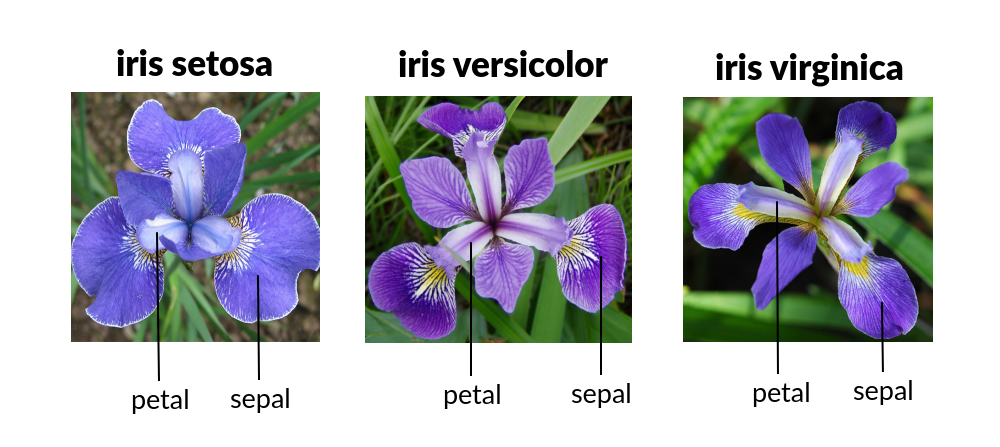

The Iris dataset is a widely recognized and extensively used dataset in the domains of machine learning and data science. It comprises 150 samples of iris flowers, with 50 samples belonging to each of three species: Iris setosa, Iris versicolor, and Iris virginica. The dataset records four features for each sample, which include sepal length, sepal width, petal length, and petal width. The measurements for both sepals and petals are in centimeters.

The main objective of the dataset is to classify the samples into their respective species based on the four features recorded. This objective is a classic example of a supervised learning problem, which involves learning a model that can predict the target (in this case, the species) from the input features (the four measurements).

The Iris dataset is a popular benchmark dataset that is widely employed for testing machine learning algorithms, as well as a teaching dataset that is used to teach the fundamentals of data exploration, visualization, and machine learning. The dataset's popularity stems from its simplicity, size, and wide availability.

In [19]:
# Import libraries
from sklearn import datasets
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load iris data
iris = datasets.load_iris()

# check type
type(iris)

sklearn.utils.Bunch

In [3]:
# print iris bunch keys
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
# type iris data and iris target
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [5]:
# data shape
iris.data.shape

(150, 4)

In [6]:
# iris target names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
# Extract the input features and target labels from the dataset
X = iris.data
y = iris.target_names[iris.target]

# Create a DataFrame with the input features and target labels
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y


In [8]:
# Explore the dataset
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [9]:
# Print some summary statistics of the dataset
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [10]:
# print data info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


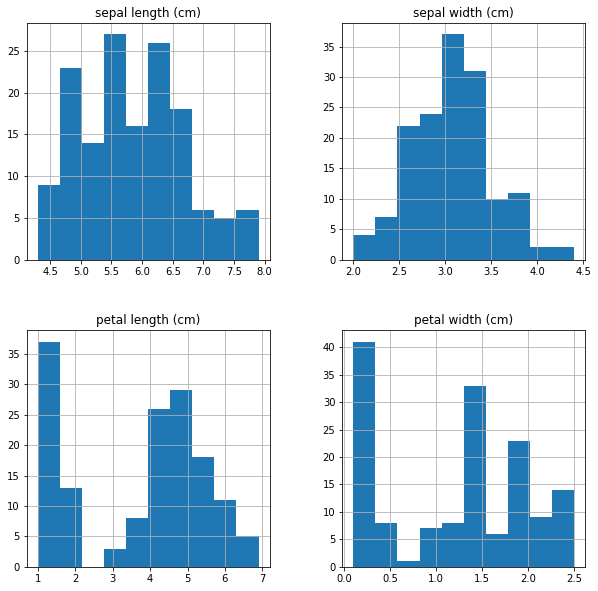

In [11]:
# Visualize the distribution of variables using histograms
df.hist(figsize=(10,10))
plt.show()



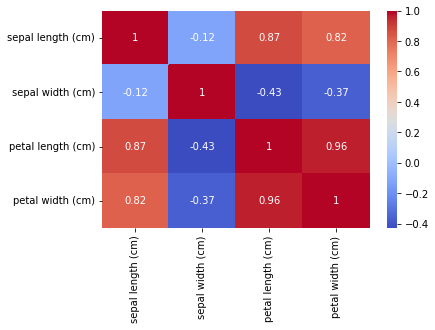

In [12]:
# Analyze the correlation between variables using a heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

c:\users\hafee\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


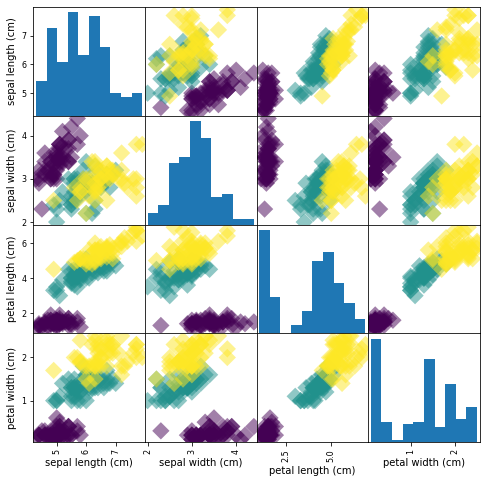

In [13]:
# Plot a scatter matrix of the dataset
fig, ax = plt.subplots(figsize=[8,8])
scatter_matrix = pd.plotting.scatter_matrix(df, c=iris.target, ax=ax, s=150, marker='D')
plt.show()


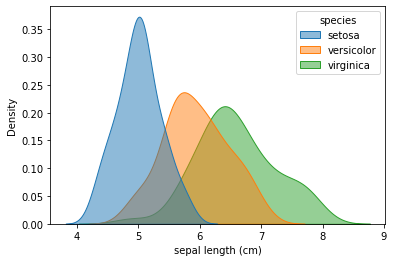

In [14]:
# Visualize the distribution of variables using density plots
sns.kdeplot(data=df, x="sepal length (cm)", hue="species", fill=True, alpha=.5)
plt.show()

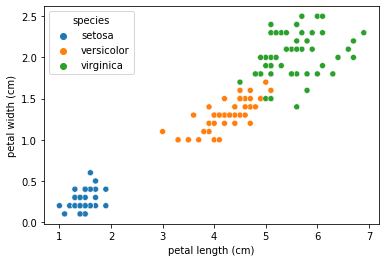

In [15]:
# Visualize the relationship between variables using scatter plots
sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue="species")
plt.show()



In [17]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], iris.target, test_size=0.3, random_state=42)

# Train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = logreg.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))


Accuracy score: 1.0
Confusion matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [21]:
# Save the model to a file using pickle
with open('model/iris_model.pkl', 'wb') as f:
    pickle.dump(logreg, f)

In [22]:
# save your DataFrame is named 'df'
df.to_csv('data/iris.csv', index=False)